In [13]:
import dill as pickle 
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def pickler(path,pkl_name,obj):
    with open(os.path.join(path, pkl_name), 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def unpickler(path,pkl_name):
    with open(os.path.join(path, pkl_name) ,'rb') as f:
        obj = pickle.load(f)
    return obj

In [7]:
lstm_avg = "/home/bhargav/nlu_project/keras_n20/model_outputs/lstm-avg/"
lstm_and_kg = './model_outputs/lstm_and_kg/'
lstm_Es_Rc = './model_outputs/lstm_Es_Rc/'
lstm_Es_Rs_20 = './model_outputs/lstm_Es_Rs_20/'
lstm_Es_Rs_cos = './model_outputs/lstm_Es_Rs_cos/'

In [11]:
lstm_avg_h = unpickler(lstm_avg,"history.pkl")
lstm_and_kg_h = unpickler(lstm_and_kg,"history.pkl")
lstm_Es_Rc_h = unpickler(lstm_Es_Rc,"history.pkl")
lstm_Es_Rs_20_h = unpickler(lstm_Es_Rs_20,"history.pkl")
lstm_Es_Rs_cos_h = unpickler(lstm_Es_Rs_cos,"history.pkl")

In [14]:
lstm_and_kg_h['val_acc']

20

In [30]:
df =  pd.DataFrame({
    'epoch':range(1,len(lstm_and_kg_h['val_acc'])+1), 
    'lstm_avg':   lstm_avg_h['val_acc']  ,
    'KG_clusters': lstm_and_kg_h['val_acc'],
    'Entity_shortlist_relation_clusters' : lstm_Es_Rc_h['val_acc'],
    'Entity_shortlist_20_common_relations' : lstm_Es_Rs_20_h['val_acc'],
    'Entity_shortlist_cosine_similarity_relations': lstm_Es_Rs_cos_h['val_acc']
                                  })

In [31]:
df.head()

,Entity_shortlist_20_common_relations,Entity_shortlist_cosine_similarity_relations,Entity_shortlist_relation_clusters,KG_clusters,epoch,lstm_avg
0,0.471868,0.464968,0.425690,0.233015,1,0.246815
1,0.538217,0.525478,0.571125,0.307325,2,0.281316
2,0.599257,0.603503,0.608811,0.408174,3,0.391720
3,0.612527,0.607219,0.643312,0.414544,4,0.463376
4,0.642251,0.643312,0.633758,0.444268,5,0.459130


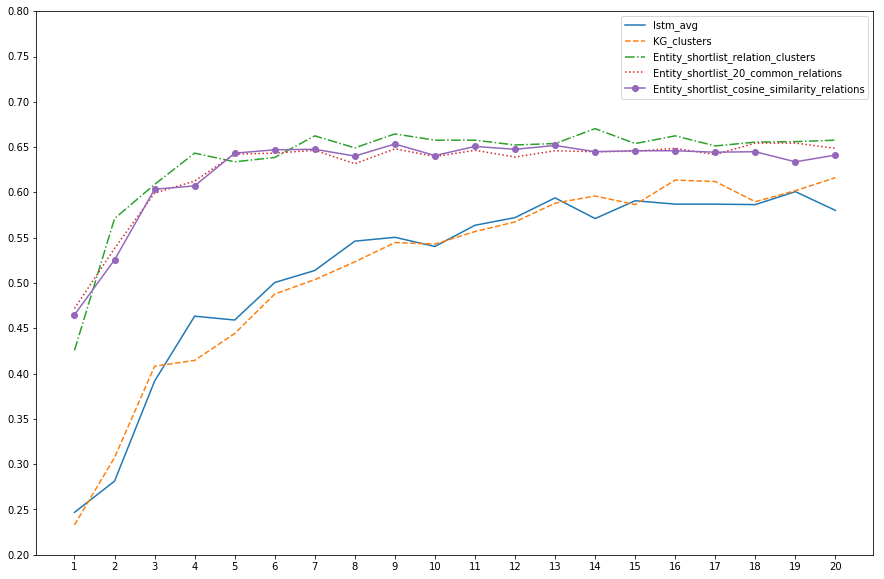

In [43]:
# multiple line plot
# linestyles = ['-', '--', '-.', ':']

fig = plt.figure(figsize=(15,10))
plt.plot( 'epoch', 'lstm_avg', data=df,linestyle='-')
plt.plot( 'epoch', 'KG_clusters', data=df,linestyle='--')
plt.plot( 'epoch', 'Entity_shortlist_relation_clusters', data=df,linestyle='-.')
plt.plot( 'epoch', 'Entity_shortlist_20_common_relations', data=df,linestyle=':')
plt.plot( 'epoch', 'Entity_shortlist_cosine_similarity_relations', data=df,marker='o')
plt.xticks(np.arange(1,21))
plt.yticks(np.arange(0.2,0.8,0.05))
plt.legend()